In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris=load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(int)
per_clf=Perceptron()
per_clf.fit(X,y)
y_pred=per_clf.predict([[2,0.5]])
y_pred

array([0])

In [2]:
#mae over mse when more outliers
#image clf using sequential API
import tensorflow as tf
from tensorflow import keras
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [3]:
tf.__version__

'2.18.0'

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

In [6]:
#validation set(scaling karni hai na gds ke liye isliye divided by 255)
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [7]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [8]:
y_train.dtype

dtype('uint8')

In [9]:
y_train[0]

4

In [10]:
class_names[y_train[2]]

'Sneaker'

In [11]:
#creating a model using seq API
model=keras.models.Sequential([
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(300,activation="relu"),
     keras.layers.Dense(100,activation="relu"),
     keras.layers.Dense(10,activation="softmax")
])

C:\Users\khush\ml\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
h1=model.layers[1]

In [15]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [16]:
h1.name

'dense'

In [17]:
h1.get_weights()

[array([[ 0.01540465, -0.03724967, -0.03766475, ...,  0.04167464,
          0.07330962, -0.05306999],
        [-0.02379714, -0.05588123,  0.05959313, ...,  0.0123407 ,
          0.00343765, -0.05159929],
        [-0.01857292, -0.03707752, -0.07417229, ..., -0.04940906,
         -0.06074798, -0.01561267],
        ...,
        [-0.06437642, -0.01395235,  0.04905146, ...,  0.06137593,
         -0.05766307, -0.02346622],
        [-0.03536889,  0.03587114, -0.04239934, ..., -0.03084332,
          0.07184342, -0.06947511],
        [ 0.03286608,  0.00835602,  0.07337275, ...,  0.05065867,
         -0.00911263, -0.02099578]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [19]:
history=model.fit(X_train,y_train,epochs=30,
                  validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6812 - loss: 0.9959 - val_accuracy: 0.8338 - val_loss: 0.5018
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8252 - loss: 0.5016 - val_accuracy: 0.8498 - val_loss: 0.4454
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8463 - loss: 0.4430 - val_accuracy: 0.8598 - val_loss: 0.4160
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8551 - loss: 0.4159 - val_accuracy: 0.8612 - val_loss: 0.4030
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8609 - loss: 0.3933 - val_accuracy: 0.8654 - val_loss: 0.3932
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8639 - loss: 0.3841 - val_accuracy: 0.8704 - val_loss: 0.3701
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8697 - loss: 0.3679 - val_accuracy: 0.8676 - val_loss: 0.3744
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8761 - loss: 0.3492 - 

AttributeError: 'Axes' object has no attribute 'set__ylim'

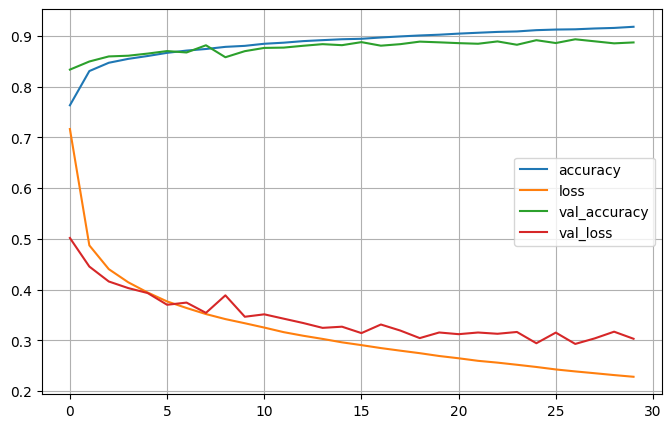

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set__ylim(0,1)
plt.show()

In [21]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8502 - loss: 61.1887


[63.373844146728516, 0.8479999899864197]

In [22]:
#using model to make predctions
X_new=X_test[:3]
y_pred=model.predict(X_new)
y_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
# regression mlp using sequential api
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.fit_transform(X_valid)
X_test=scaler.fit_transform(X_test)

In [24]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)

Epoch 1/20


C:\Users\khush\ml\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3203 - val_loss: 0.6603
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3407 - val_loss: 0.4859
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4455 - val_loss: 0.4535
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4170 - val_loss: 0.4372
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4055 - val_loss: 0.4227
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4007 - val_loss: 0.4172
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3896 - val_loss: 0.4328
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3626 - val_loss: 0.4321
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3717 - val_loss: 0.4351
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3611 - val_loss: 0.4363
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4035 - val_loss: 0.4520
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

In [25]:
# functional api-complex models
input_=keras.layers.Input(shape=X_train.shape[1:])
hid1=keras.layers.Dense(30,activation="relu")(input_)
hid2=keras.layers.Dense(30,activation="relu")(hid1)
concat=keras.layers.Concatenate()([input_,hid2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=[output])


In [26]:
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2703 - val_loss: 3.3539
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55.3107 - val_loss: 160.4170
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 13/20
363/363 ━━

In [27]:
y_pred

array([[nan],
       [nan],
       [nan]], dtype=float32)

In [28]:
#functional api 2:
input_A=keras.layers.Input(shape=[5],name="wide_input")
input_B=keras.layers.Input(shape=[6],name="deep_input")
hid1=keras.layers.Dense(30,activation="relu")(input_B)
hid2=keras.layers.Dense(30,activation="relu")(hid1)
concat=keras.layers.Concatenate()([input_A,hid2])
output=keras.layers.Dense(1,name="output")(concat)
model=keras.Model(inputs=[input_A,input_B],outputs=[output])

In [29]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1e-3))
X_train_A,X_train_B=X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B=X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B=X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B=X_test_A[:3],X_test_B[:3]

In [30]:
X_train_A.shape

(11610, 5)

In [31]:
history=model.fit((X_train_A,X_train_B),y_train,epochs=20,
                  validation_data=((X_valid_A,X_valid_B),y_valid))
mse_test=model.evaluate((X_test_A,X_test_B),y_test)
y_pred=model.predict((X_new_A,X_new_B))
save_m=model.save("m1.keras")

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2101 - val_loss: 1.0130
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9137 - val_loss: 0.7354
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6758 - val_loss: 0.6405
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6258 - val_loss: 0.5918
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5656 - val_loss: 0.5537
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5263 - val_loss: 0.5305
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5109 - val_loss: 0.5102
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4846 - val_loss: 0.4935
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4894 - val_loss: 0.4819
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4757 - val_loss: 0.4752
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4688 - val_loss: 0.4692
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [32]:
input_A=keras.layers.Input(shape=[5],name="wide_input")
input_B=keras.layers.Input(shape=[6],name="deep_input")
hid1=keras.layers.Dense(30,activation="relu")(input_B)
hid2=keras.layers.Dense(30,activation="relu")(hid1)
concat=keras.layers.Concatenate()([input_A,hid2])
output=keras.layers.Dense(1,name="main_output")(concat)
aux_output=keras.layers.Dense(1,name="aux_output")(hid2)
model=keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])


In [33]:
model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="sgd")

In [34]:
print(X_train_A.shape, X_train_B.shape, y_train.shape)
print(X_valid_A.shape, X_valid_B.shape, y_valid.shape)


(11610, 5) (11610, 6) (11610,)
(3870, 5) (3870, 6) (3870,)


In [35]:
history=model.fit(
    [X_train_A,X_train_B],[y_train,y_train],epochs=20,
    validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 0.2775 - loss: 2.0731 - main_output_loss: 1.7956 - val_aux_output_loss: 0.1213 - val_loss: 0.6246 - val_main_output_loss: 0.5032
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.1137 - loss: 0.5847 - main_output_loss: 0.4710 - val_aux_output_loss: 0.0973 - val_loss: 0.5264 - val_main_output_loss: 0.4290
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.0927 - loss: 0.5109 - main_output_loss: 0.4182 - val_aux_output_loss: 0.0808 - val_loss: 0.4793 - val_main_output_loss: 0.3985
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.0803 - loss: 0.4937 - main_output_loss: 0.4134 - val_aux_output_loss: 0.0704 - val_loss: 0.4639 - val_main_output_loss: 0.3935
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.0704 - loss: 0.4857 - main_output_loss: 0.4153 - val_aux_output_loss: 0.0662 - val_loss: 0.4561 - val_main_output_loss: 0.3899


In [36]:
total_loss,main_loss,aux_loss=model.evaluate(
    [X_test_A,X_test_B],[y_test,y_test])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - aux_output_loss: 0.0530 - loss: 0.3972 - main_output_loss: 0.3442


In [37]:
X_new_A = np.array(X_new_A)
X_new_B = np.array(X_new_B)
y_pred_main,y_pred_aux=model.predict([X_new_A,X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [38]:
#subclassing API:Dynamic Models
class WideAndDeepModel(keras.Model):
  def __init__(self,units=30,activation="relu",**kwargs):
    super().__init__(**kwargs)
    self.hidden1=keras.layers.Dense(units,activation=activation)
    self.hidden2=keras.layers.Dense(units,activation=activation)
    self.main_output=keras.layers.Dense(1)
    self.aux_output=keras.layers.Dense(1)
  def call(self,inputs):
    input_A,input_B=inputs
    hidden1=self.hidden1(input_B)
    hidden2=self.hidden2(hidden1)
    concat=keras.layers.Concatenate()([input_A,hidden2])
    main_out=self.main_out(concat)
    aux_out=self.aux_out(hidden2)
    return main_out,aux_out

In [47]:
model=WideAndDeepModel()

In [50]:
#creating a functional api to get the concept of callbacks
input_=keras.layers.Input(shape=X_train.shape[1:])
hid1=keras.layers.Dense(30,activation="relu")(input_)
hid2=keras.layers.Dense(30,activation="relu")(hid1)
concat=keras.layers.Concatenate()([input_,hid2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=[output])

In [54]:
#compiling and saving the model
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1e-3))
X_train_A,X_train_B=X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B=X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B=X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B=X_test_A[:3],X_test_B[:3]
history=model.fit(X_train,y_train,epochs=20,
                  validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test_A,y_test)
y_pred=model.predict(X_new)
save_m=model.save("m1.keras")

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5197 - val_loss: 0.8262
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7345 - val_loss: 0.7401
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6813 - val_loss: 0.6876
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6308 - val_loss: 0.6495
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5732 - val_loss: 0.6218
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5461 - val_loss: 0.5968
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5448 - val_loss: 0.5776
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5453 - val_loss: 0.5619
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5363 - val_loss: 0.5488
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5162 - val_loss: 0.5374
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4982 - val_loss: 0.5278
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

InvalidArgumentError: Graph execution error:

Detected at node functional_5_1/dense_23_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\khush\ml\env\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\khush\ml\env\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\khush\ml\env\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\khush\ml\env\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\khush\ml\env\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\khush\ml\env\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\khush\ml\env\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\khush\ml\env\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\khush\ml\env\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\khush\ml\env\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\khush\ml\env\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\khush\ml\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\khush\ml\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\khush\ml\env\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\khush\ml\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\khush\ml\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\khush\ml\env\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\khush\AppData\Local\Temp\ipykernel_26144\2067704583.py", line 9, in <module>

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 433, in evaluate

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 165, in one_step_on_iterator

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 154, in one_step_on_data

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 82, in test_step

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\layers\layer.py", line 901, in __call__

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\models\functional.py", line 175, in call

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\models\functional.py", line 560, in call

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\layers\layer.py", line 901, in __call__

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\layers\core\dense.py", line 148, in call

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\activations\activations.py", line 99, in static_call

  File "C:\Users\khush\ml\env\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 15, in relu

Matrix size-incompatible: In[0]: [32,5], In[1]: [8,30]
	 [[{{node functional_5_1/dense_23_1/Relu}}]] [Op:__inference_one_step_on_iterator_231649]

In [58]:
#saving and restoring models
#using callbacks to create checkpoints
checkpoint_cb=keras.callbacks.ModelCheckpoint("m1.keras",save_best_only=True)
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=10,callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4020 - val_loss: 0.4215
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4293 - val_loss: 0.4215
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4160 - val_loss: 0.4183
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4176 - val_loss: 0.4205
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4198 - val_loss: 0.4148
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4058 - val_loss: 0.4146
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4215 - val_loss: 0.4116
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4028 - val_loss: 0.4115
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4155 - val_loss: 0.4104
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4083 - val_loss: 0.4099


In [60]:
#using tensorboard for visualization
import os
root_logdir=os.path.join(os.curdir,"my_logs")
def get_run_logdir():
    import time
    run_id=time.strftime("run_%Y_%m_%d_%H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir=get_run_logdir()

In [61]:
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),callbacks=[tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4063 - val_loss: 0.4087
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4023 - val_loss: 0.4057
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4039 - val_loss: 0.4064
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4114 - val_loss: 0.4039
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3983 - val_loss: 0.4025
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4049 - val_loss: 0.4026
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3830 - val_loss: 0.4027
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3944 - val_loss: 0.4023
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3970 - val_loss: 0.4037
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3894 - val_loss: 0.3994
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3819 - val_loss: 0.3998
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [64]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [ ]:
test_logdir=get_run_logdir()
writer=tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1,1000+1):
        tf.summary.scalar

In [66]:
def huber_fn(y_true,y_pred):
    error=y_true-y_pred
    is_small=tf.abs(error)<1
    sq_loss=tf.square(error)/2
    linear_loss=tf.abs(error)-0.5
    return tf.where(is_small,sq_loss,linear_loss)

In [70]:
model.compile(loss=huber_fn,optimizer="nadam")

In [71]:
model.fit(X_train,y_train)

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1714


In [72]:
#saving and loading models that contain custom components
model=keras.models.load_model("my_model_with_a custom_loss.h5",custom_objects={"huber_fn":huber_fn})

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'my_model_with_a custom_loss.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [2]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(int)
per_clf=Perceptron()
per_clf.fit(X,y)
y_pred=per_clf.predict([[2,0.5]])

In [3]:
y_pred

array([0])

In [7]:
#image classifier in sequential api
#step 1-loading the dataset
import tensorflow as tf
from tensorflow import keras
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [10]:
y_train_full.shape

(60000,)

In [17]:
#step 2-scaling features and creating the validation set
X_valid,X_train=X_train_full[:50000]/255.0,X_train_full[50000:]/255.0
y_valid,y_train=y_train_full[:50000],y_train_full[50000:]

In [18]:
#we need to know class names mnist me to class name=label=digit it represents
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [22]:
class_names[y_train[0]]

'Ankle boot'

In [24]:
#step 3-model using sequential api
#classification mlp with 2 hidden layers
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

C:\Users\khush\ml\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
#step 4-summarizing
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [33]:
dense=model.layers[1]
weights,biases=dense.get_weights()
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
biases.shape

(300,)

In [38]:
#step 5-compiling the model
#compile method-specifying the loss func and optimizer
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [40]:
#step6-training and evaluating,you can also set vslidation_split=ratio instead of passing
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5280 - loss: 1.5612 - val_accuracy: 0.7230 - val_loss: 0.8203
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7489 - loss: 0.7438 - val_accuracy: 0.7819 - val_loss: 0.6584
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7821 - loss: 0.6365 - val_accuracy: 0.7975 - val_loss: 0.6045
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8013 - loss: 0.5855 - val_accuracy: 0.7887 - val_loss: 0.5920
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8122 - loss: 0.5507 - val_accuracy: 0.8086 - val_loss: 0.5671
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8218 - loss: 0.5245 - val_accuracy: 0.8204 - val_loss: 0.5192
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8301 - loss: 0.4985 - val_accuracy: 0.8288 - val_loss: 0.4980
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8371 - loss: 0.4733 - val_accu

In [41]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 313}

In [42]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [43]:
history.history

{'accuracy': [0.638700008392334,
  0.7569000124931335,
  0.7851999998092651,
  0.8027999997138977,
  0.8166000247001648,
  0.8238000273704529,
  0.8271999955177307,
  0.8321999907493591,
  0.8377000093460083,
  0.8410999774932861,
  0.8456000089645386,
  0.848800003528595,
  0.8518000245094299,
  0.8519999980926514,
  0.8574000000953674,
  0.8598999977111816,
  0.8637999892234802,
  0.8644999861717224,
  0.8697999715805054,
  0.8711000084877014,
  0.8741999864578247,
  0.8725000023841858,
  0.8755999803543091,
  0.8781999945640564,
  0.8809999823570251,
  0.876800000667572,
  0.8853999972343445,
  0.8844000101089478,
  0.8830000162124634,
  0.8866000175476074],
 'loss': [1.190322995185852,
  0.7235012650489807,
  0.6298400163650513,
  0.5778908729553223,
  0.5447958707809448,
  0.5179458260536194,
  0.4984425902366638,
  0.4819127321243286,
  0.4675874412059784,
  0.4548128545284271,
  0.44453129172325134,
  0.4322907626628876,
  0.4235715866088867,
  0.4191495478153229,
  0.4074629843

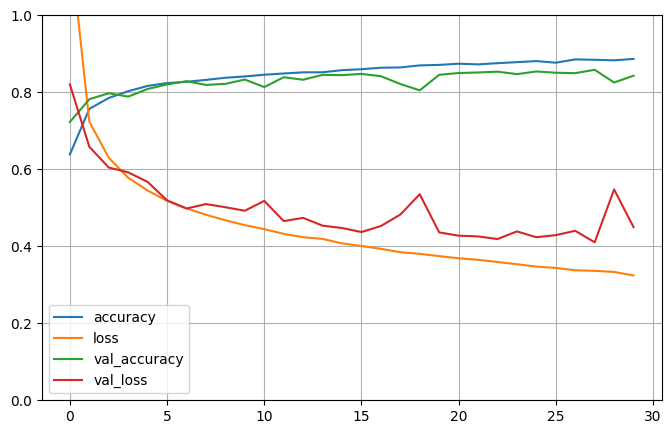

In [45]:
#plotting the accuracy
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #setting the vertical range for the plot
plt.show()

In [46]:
#evaluation on test set - generalisation error
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8195 - loss: 80.2783


[83.88233947753906, 0.8169999718666077]

In [50]:
#step 7-making predictions
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [55]:
# Regression MLP using sequential api
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)


In [56]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)

Epoch 1/20


C:\Users\khush\ml\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4928 - val_loss: 1.1837
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7882 - val_loss: 0.7052
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7043 - val_loss: 0.5222
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4653 - val_loss: 0.4158
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3964 - val_loss: 0.4028
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3648 - val_loss: 0.3909
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3896 - val_loss: 0.3831
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3658 - val_loss: 0.3762
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3674 - val_loss: 0.3850
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3501 - val_loss: 0.3714
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3703 - val_loss: 0.3900
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

In [57]:
#heading to functional api
input=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input],outputs=[output])

In [62]:
input_A=keras.layers.Input(shape=[5],name="wide_input")
input_B=keras.layers.Input(shape=[6],name="deep_input")
hidden1=keras.layers.Dense(30,activation="relu")(input_B)
hidden_2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input_A,hidden_2])
output=keras.layers.Dense(1,name="output")(concat)
model=keras.Model(inputs=[input_A,input_B],outputs=[output])

In [69]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1e-3))
X_train_A,X_train_B=X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B=X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B=X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B=X_test_A[:3],X_test_B[:3]

In [70]:
history=model.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_valid))
mse_test=model.evaluate((X_test_A,X_test_B),y_test)
y_pred=model.predict((X_new_A,X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4888 - val_loss: 0.5004
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4919 - val_loss: 0.4985
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4800 - val_loss: 0.4964
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4791 - val_loss: 0.4944
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4652 - val_loss: 0.4923
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4694 - val_loss: 0.4903
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4729 - val_loss: 0.4880
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4669 - val_loss: 0.4870
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4664 - val_loss: 0.4855
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4783 - val_loss: 0.4835
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4692 - val_loss: 0.4816
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
#subclassing api
